# Practica 3, Visualizacion de Datos

## Ej 1

In [1]:
!pip install gapminder
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from gapminder import gapminder

1) Encuesta en provincias y se quiere saber cuantas personas la resondieron en cada provincia.

Se haria un Bar plot (grafico de barras) con:
- Eje y: Cantidad de personas que respondieron
- Eje x: Provincias Argentinas

## Ej 2

Estudiar la relacion altura peso de las personas. El data-set tiene edad, sexo y peso de cada persona.

Si quiero describir estas variables por separado utilizaria:
- Scatter plot, salvo para el caso del "sexo" donde se usaria un Bar plot.


Si quisiera visualizar la relacion peso y altura se usaria tambien un Scatter plot con puntos (usando Line).


## Ej 3

In [3]:
gapminder.head()

country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106

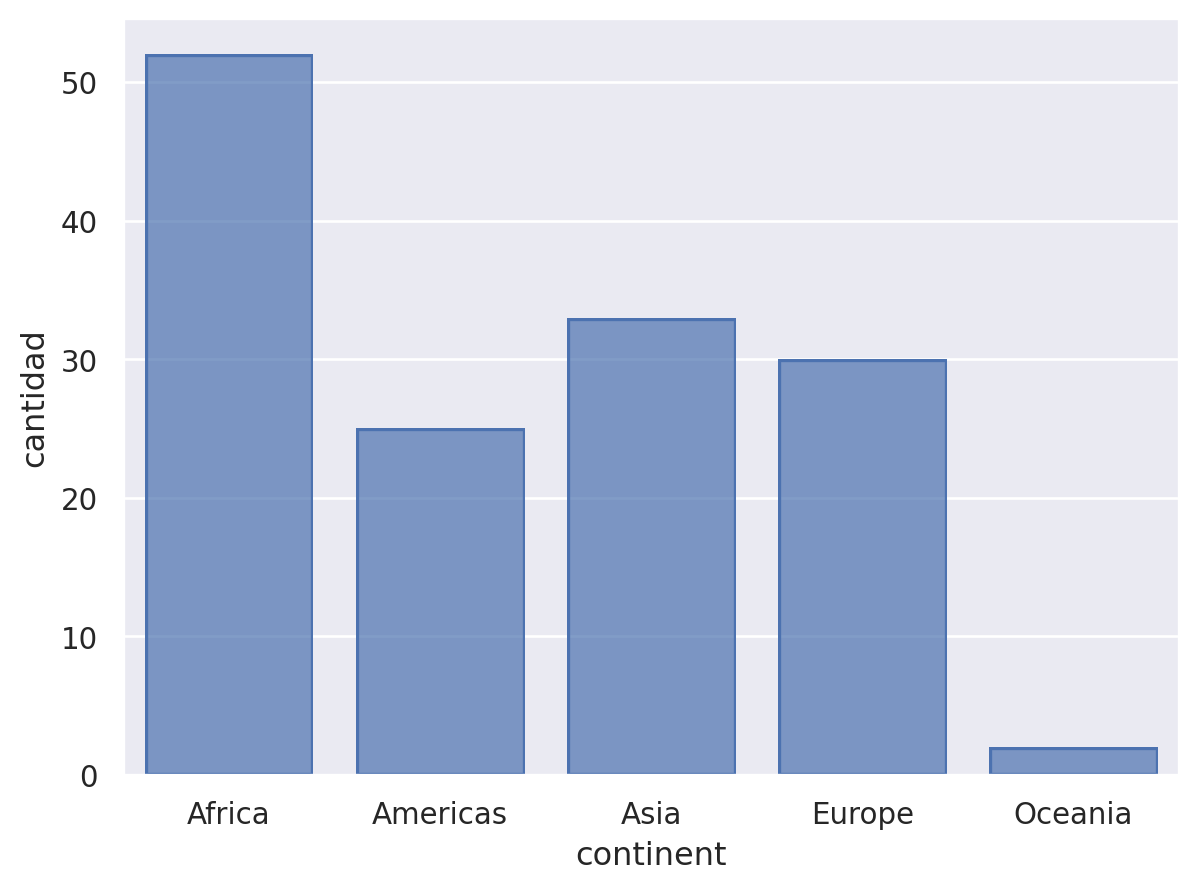

In [4]:
cantidades = gapminder.groupby("continent")["country"].nunique().reset_index(name="cantidad")
(
    so.Plot(data = cantidades, x = "continent", y = "cantidad")
    .add(so.Bar())
)

## Ej 5



### a)

Graficar la curva de exp de vida de Arg en funcion del año

In [5]:
expVida = gapminder[gapminder["country"] == "Argentina"][["year","lifeExp"]]
expVida

year  lifeExp
48  1952   62.485
49  1957   64.399
50  1962   65.142
51  1967   65.634
52  1972   67.065
53  1977   68.481
54  1982   69.942
55  1987   70.774
56  1992   71.868
57  1997   73.275
58  2002   74.340
59  2007   75.320

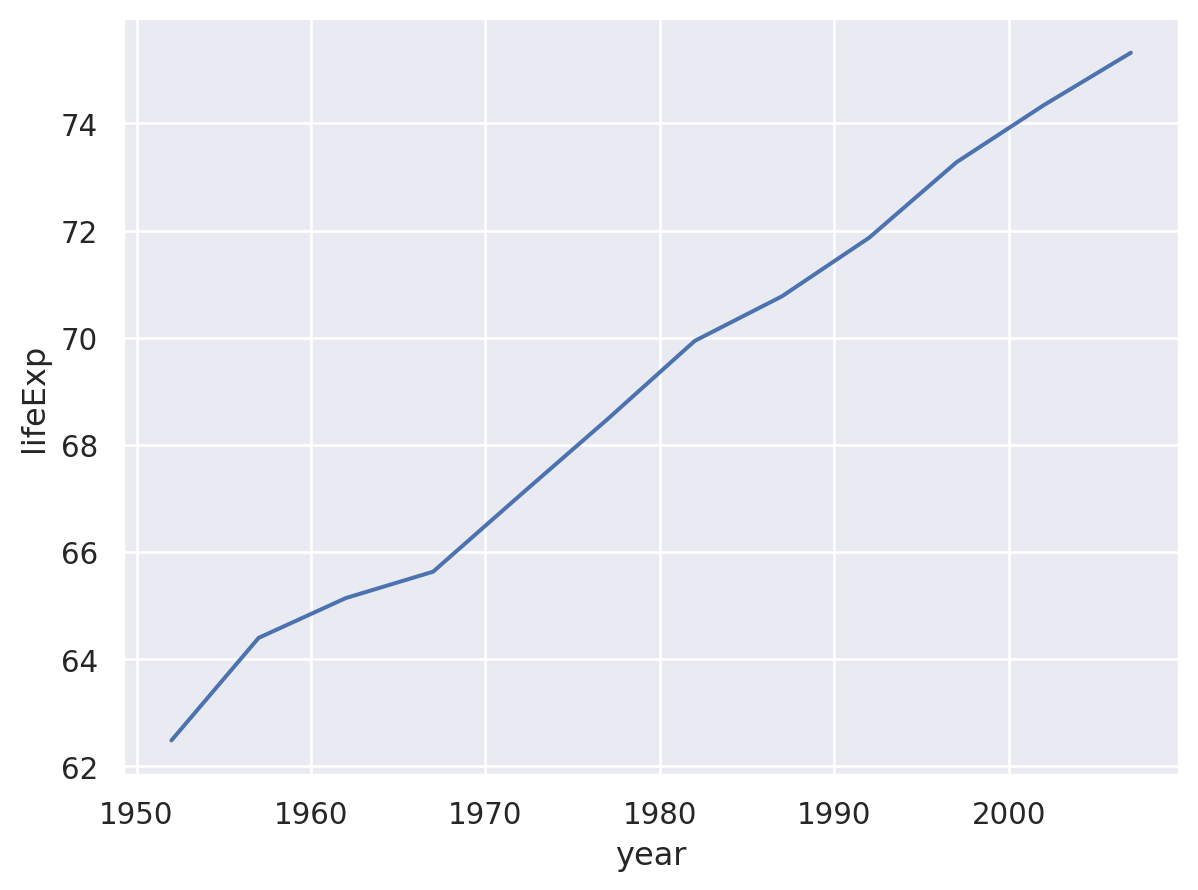

In [6]:
(
  so.Plot( data = expVida, x= "year", y = "lifeExp")
  .add(so.Line())
)

### b)

Nuevo grafico donde puedan verse las curvas de la exp de vida de los paises de america en funcion del año.


1 curva para cada pais

In [7]:
#Me creo el dataset de los paises en America con su exp de vida para todos los años
life = gapminder[gapminder["continent"] == "Americas"][["country","year","lifeExp"]]
life

country  year  lifeExp
48    Argentina  1952   62.485
49    Argentina  1957   64.399
50    Argentina  1962   65.142
51    Argentina  1967   65.634
52    Argentina  1972   67.065
...         ...   ...      ...
1639  Venezuela  1987   70.190
1640  Venezuela  1992   71.150
1641  Venezuela  1997   72.146
1642  Venezuela  2002   72.766
1643  Venezuela  2007   73.747

[300 rows x 3 columns]

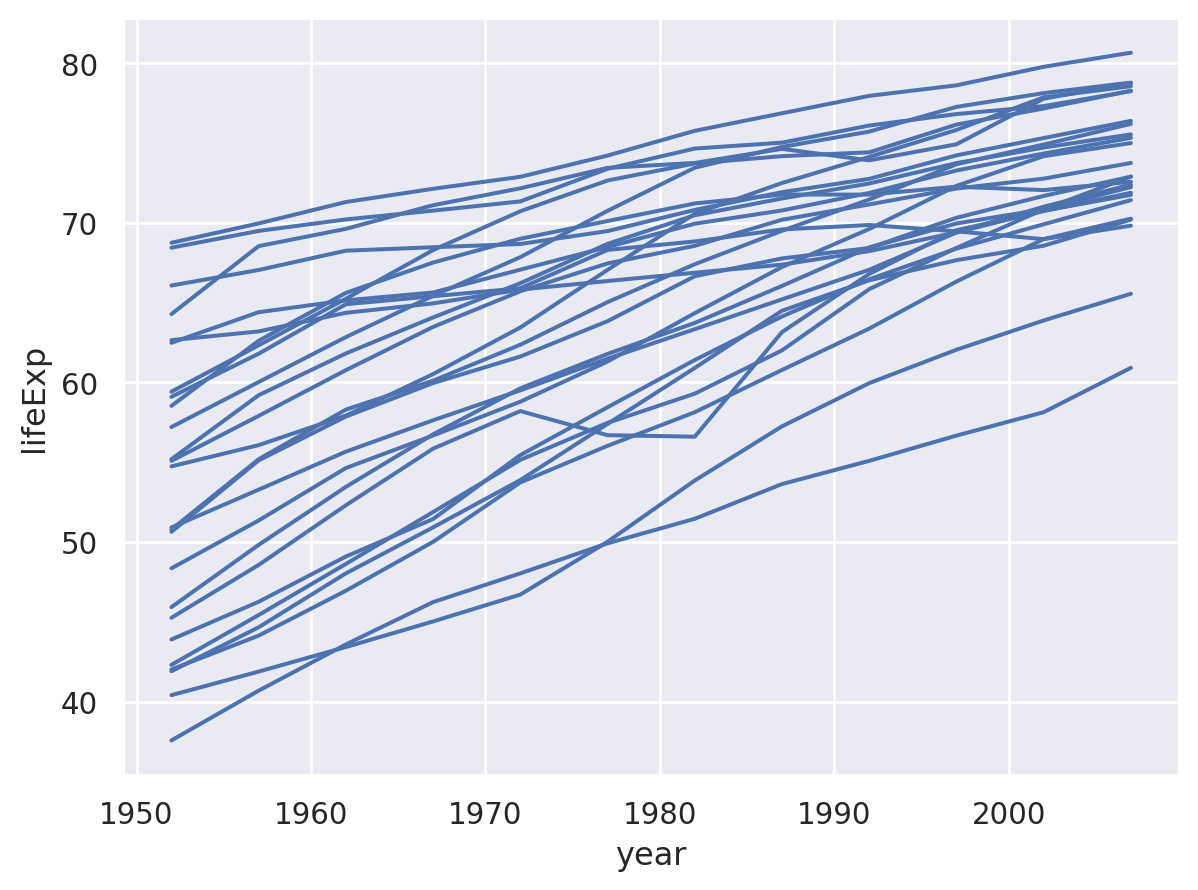

In [8]:
# El grafico usando group por country
(
  so.Plot( data = life, x= "year", y = "lifeExp", group = "country")
  .add(so.Line())
)

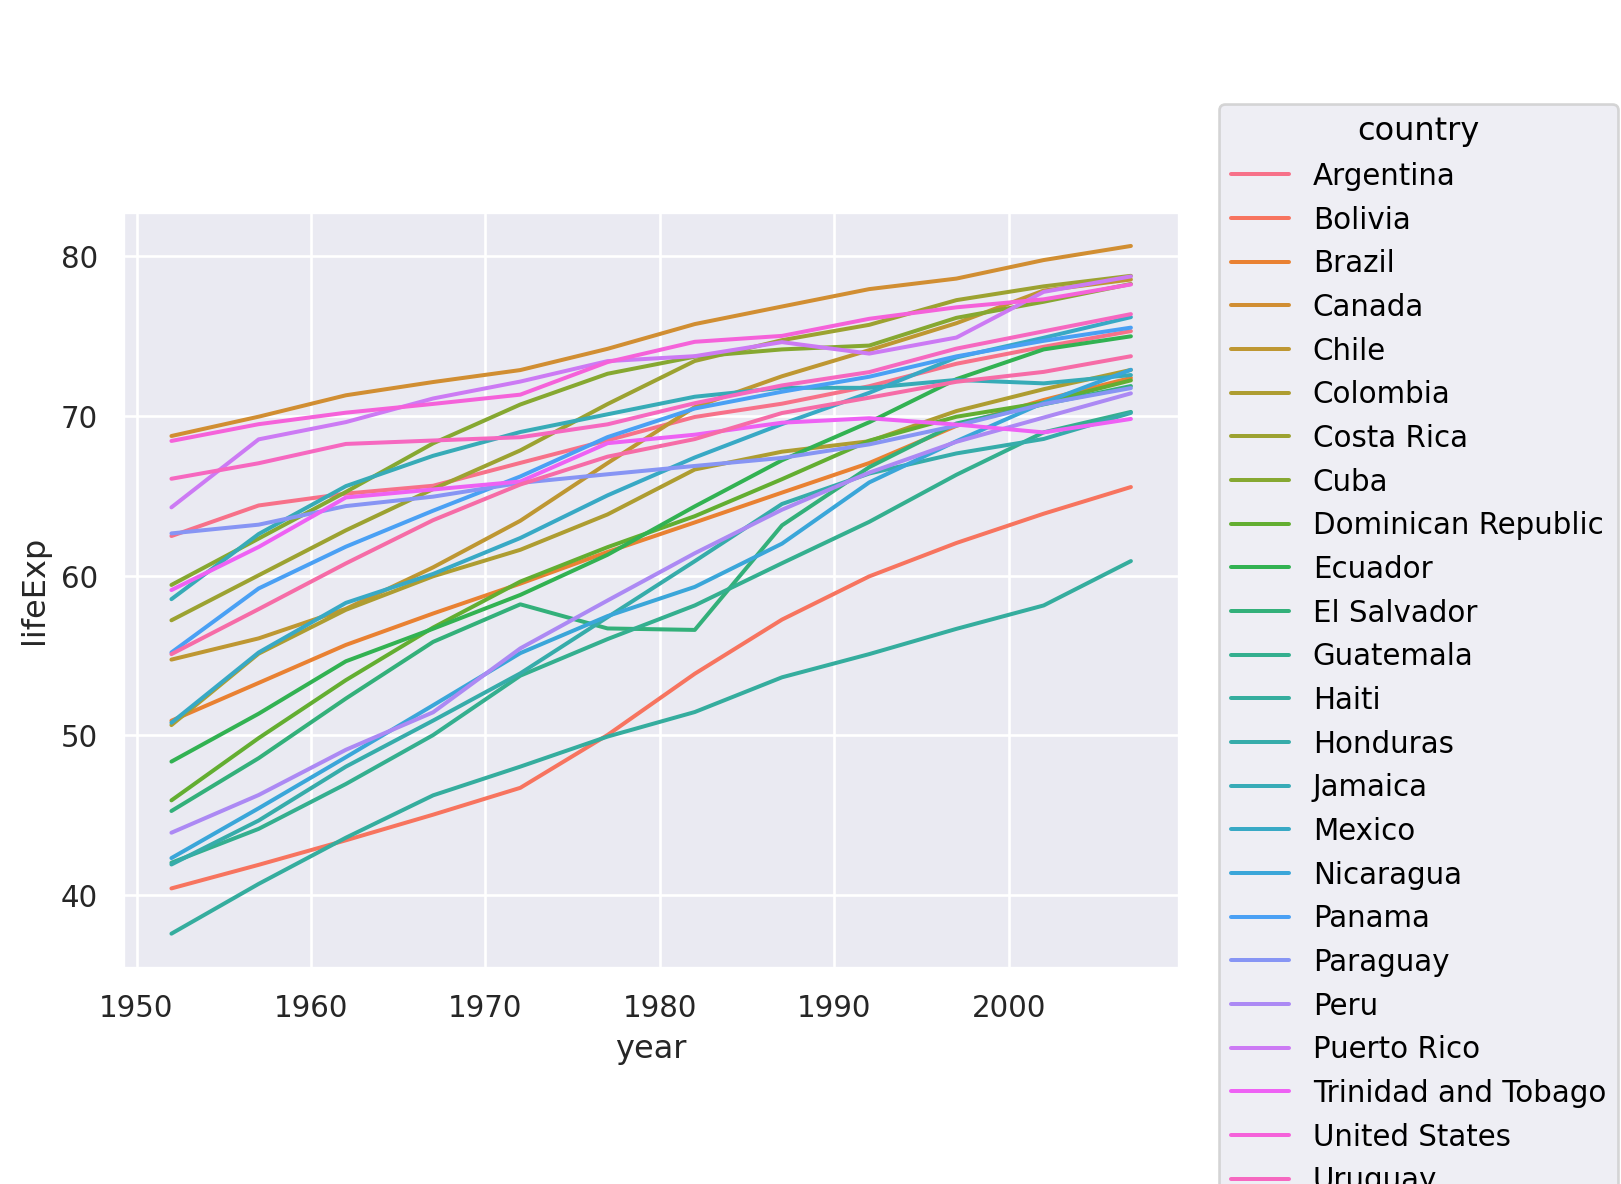

In [9]:
#Mismo grafico usando color por country
(
  so.Plot( data = life, x= "year", y = "lifeExp", color = "country")
  .add(so.Line())
)

Vemos que al usar group estamos tan solo agrupando por pais, pero no podemos ni siquiera diferenciar un pais con otro.

En cambio con color, logramos obtener un unico color para cada pais y a su vez poder diferenciar un pais de los otros.

### c)

Agregar al grafico anterior una curva de tendencia lineal utilizando el metodo .add(so.Line(), so.PolyFit(1)).

¿Cual de las siguientes formas de agrupar los datos es la forma correcta?

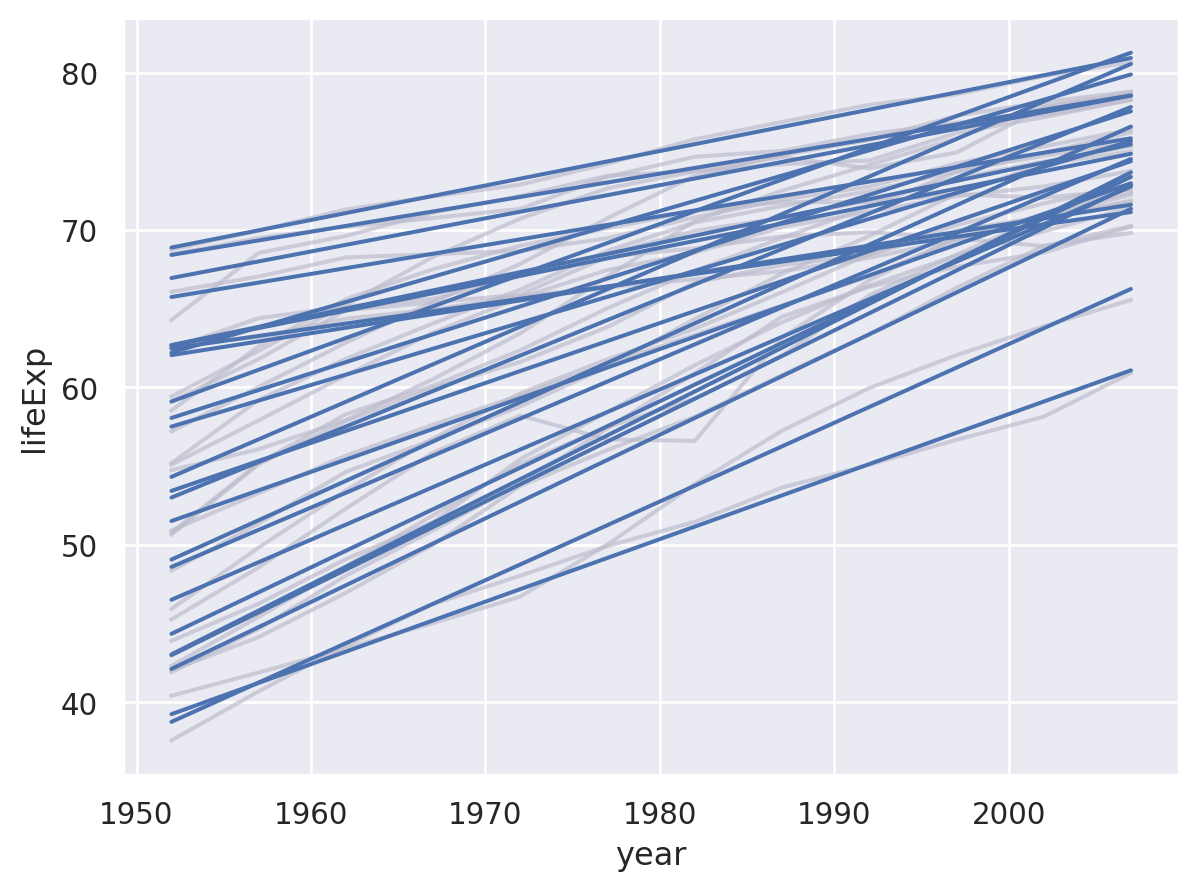

In [10]:
#codigo 1
(
  so.Plot( data = life, x= "year", y = "lifeExp", group = "country")
  .add(so.Lines(color = "#bbca"))
  .add(so.Line(), so.PolyFit(1))
)

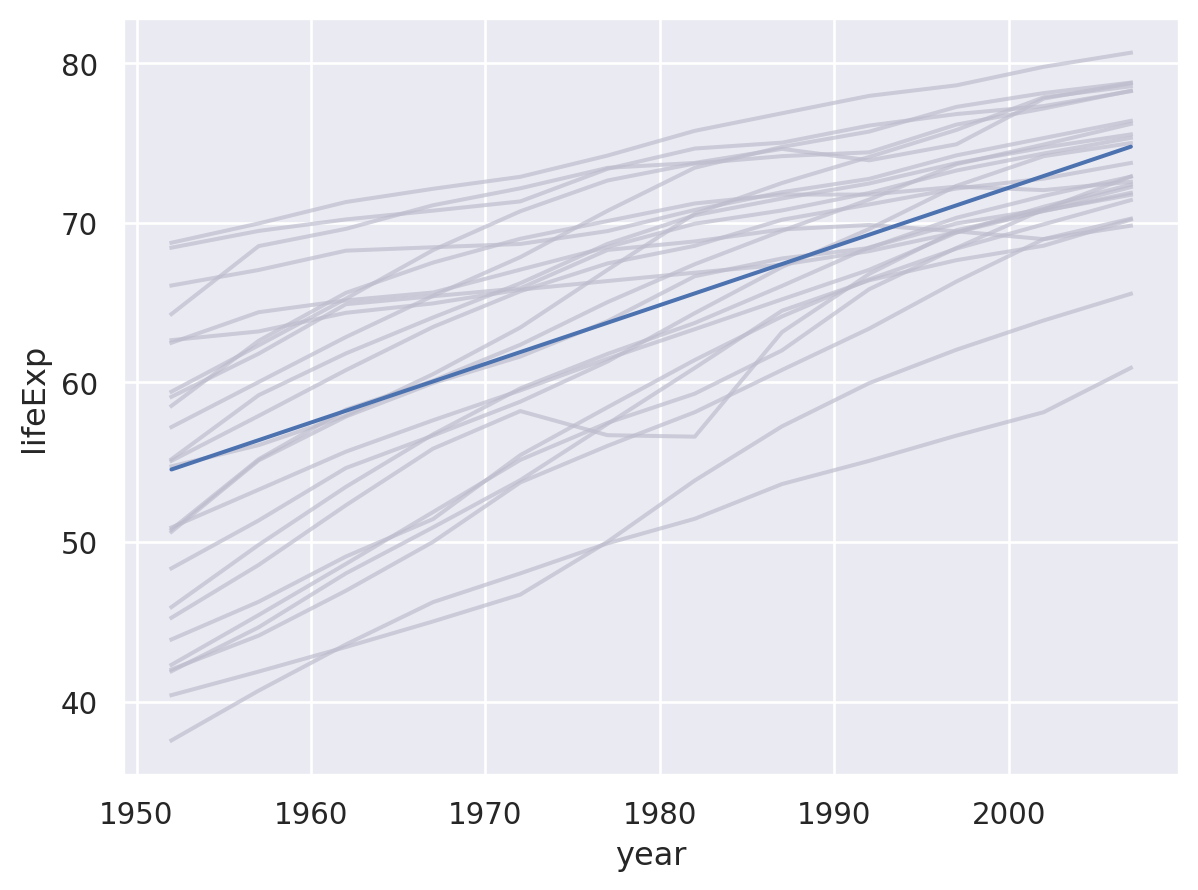

In [11]:
#codigo 2
(
  so.Plot( data = life, x= "year", y = "lifeExp")
  .add(so.Lines(color = "#bbca"), group = "country")
  .add(so.Line(), so.PolyFit(1))
)

Se nota a la vista que el codigo que queremos es el 2do.
La curva mas marcada representa la tendencia lineal.

El codigo 1, a diferencia del codigo 2, colorea muchas curvas. Se puede ver en ".add(so.**Lines**(color = ... ).

### d)

Realizar ese mismo grafico para las exp de vida de los diferentes continentes

In [12]:
America = gapminder[gapminder["continent"] == "Americas"][["country","year","lifeExp"]]
Asia = gapminder[gapminder["continent"] == "Asia"][["country","year","lifeExp"]]
Europe = gapminder[gapminder["continent"] == "Europe"][["country","year","lifeExp"]]
Africa= gapminder[gapminder["continent"] == "Africa"][["country","year","lifeExp"]]
Oceania = gapminder[gapminder["continent"] == "Oceania"][["country","year","lifeExp"]]

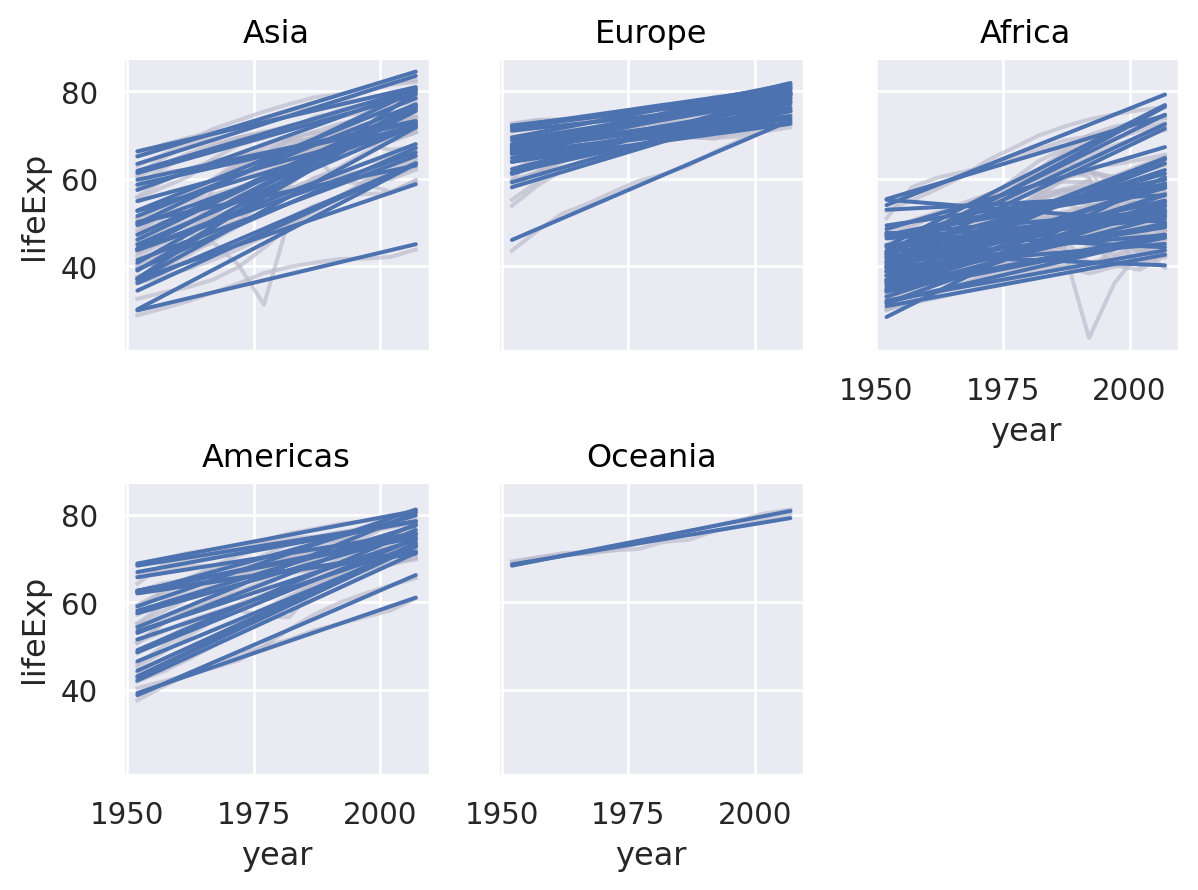

In [52]:
(
  so.Plot( data = gapminder, x= "year", y = "lifeExp", group = "country")
  .add(so.Lines(color = "#bbca"), group = "country")
  .add(so.Line(), so.PolyFit(1))
  .facet("continent", wrap = 3)
)

O de forma individual

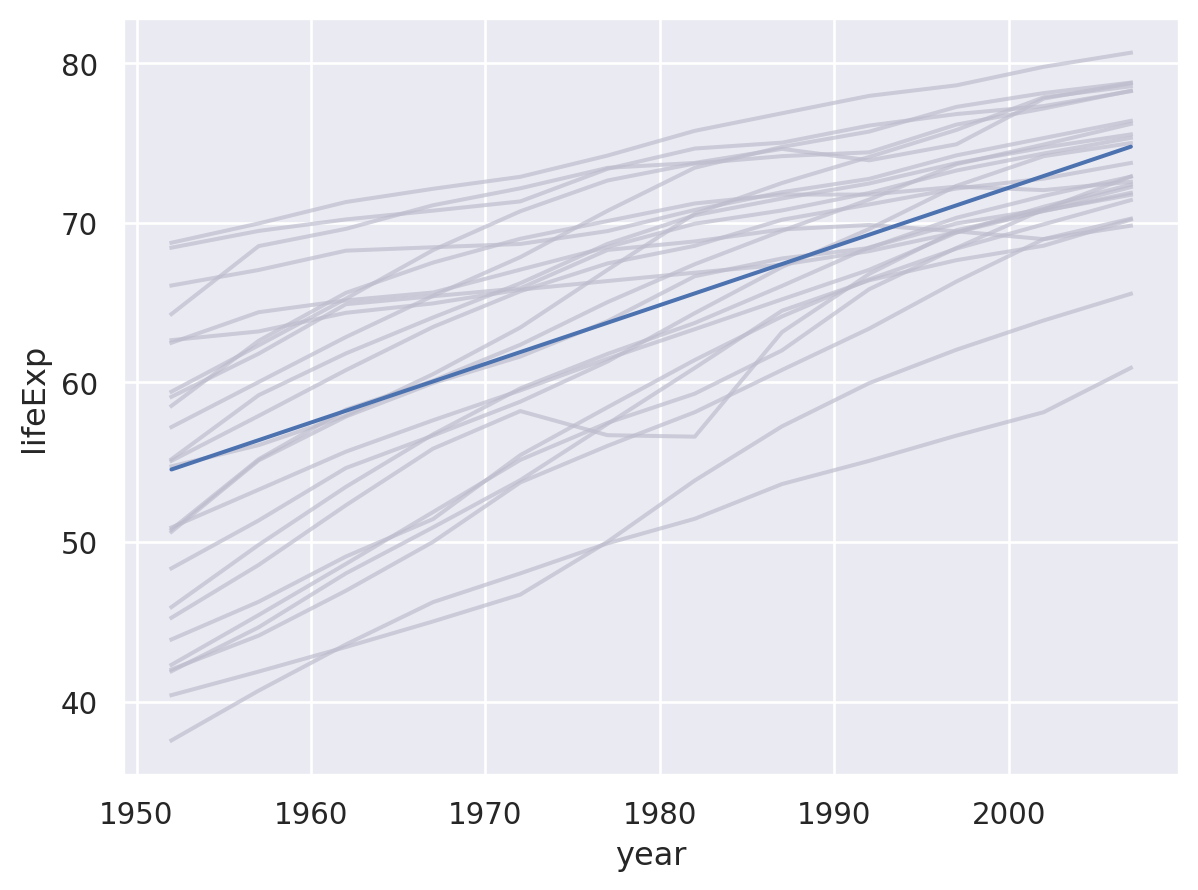

In [13]:
#America
(
  so.Plot( data = America, x= "year", y = "lifeExp")
  .add(so.Lines(color = "#bbca"), group = "country")
  .add(so.Line(), so.PolyFit(1))
)

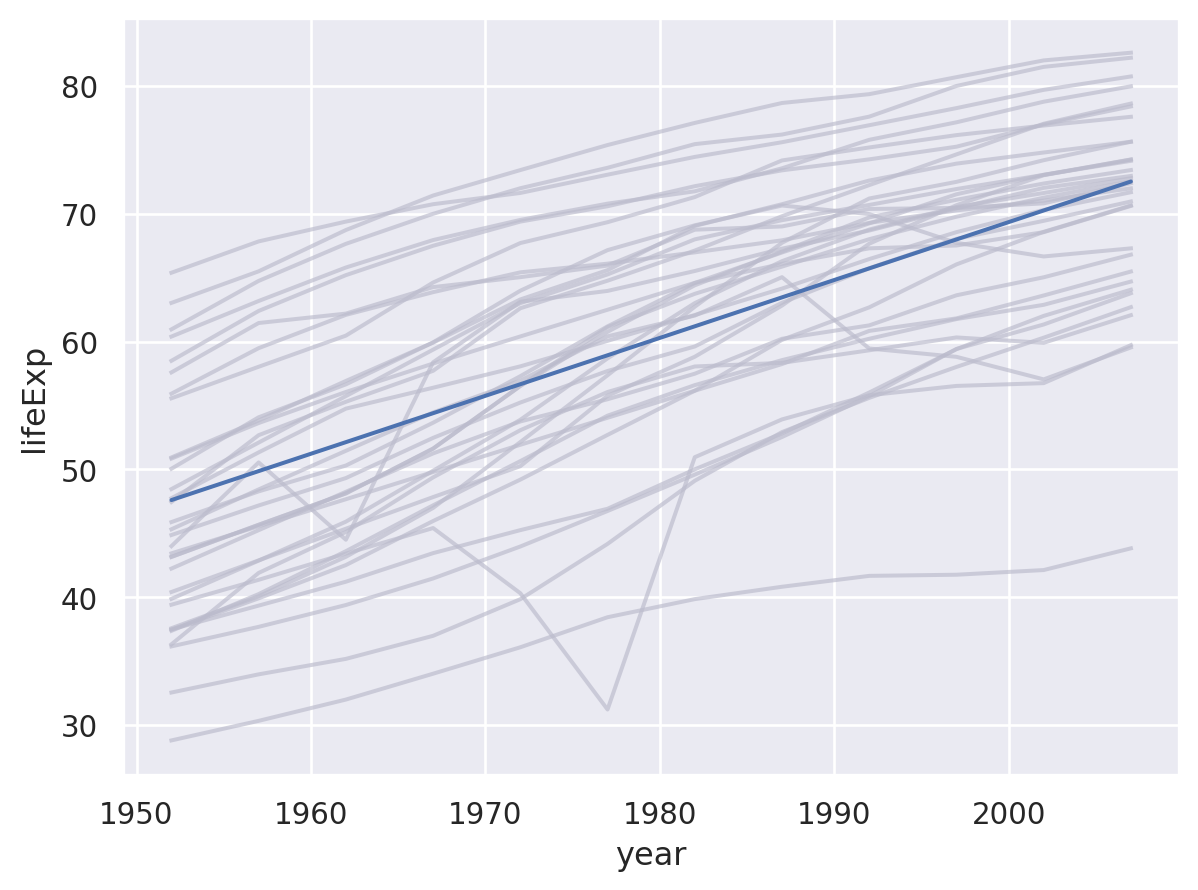

In [14]:
#Asia
(
  so.Plot( data = Asia, x= "year", y = "lifeExp")
  .add(so.Lines(color = "#bbca"), group = "country")
  .add(so.Line(), so.PolyFit(1))
)


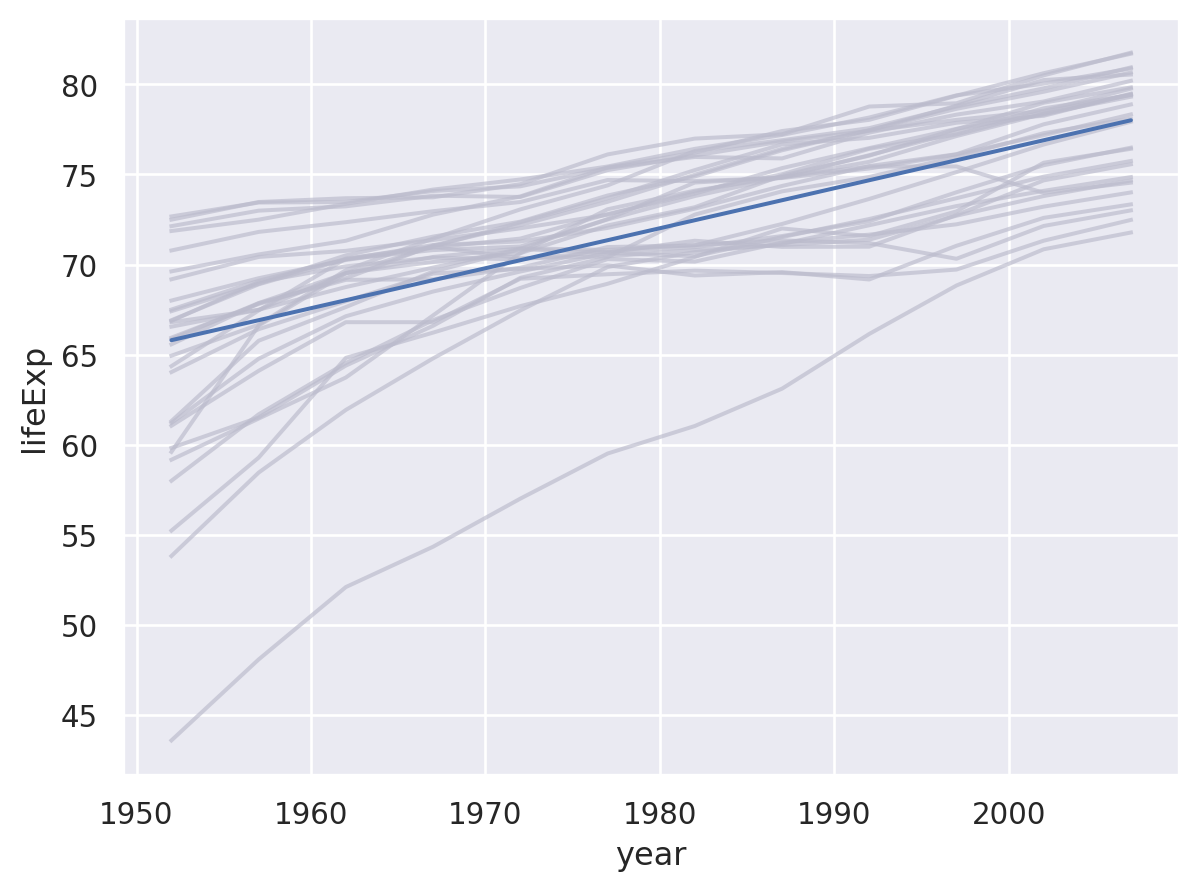

In [15]:
#Europe
(
  so.Plot( data = Europe, x= "year", y = "lifeExp")
  .add(so.Lines(color = "#bbca"), group = "country")
  .add(so.Line(), so.PolyFit(1))
)


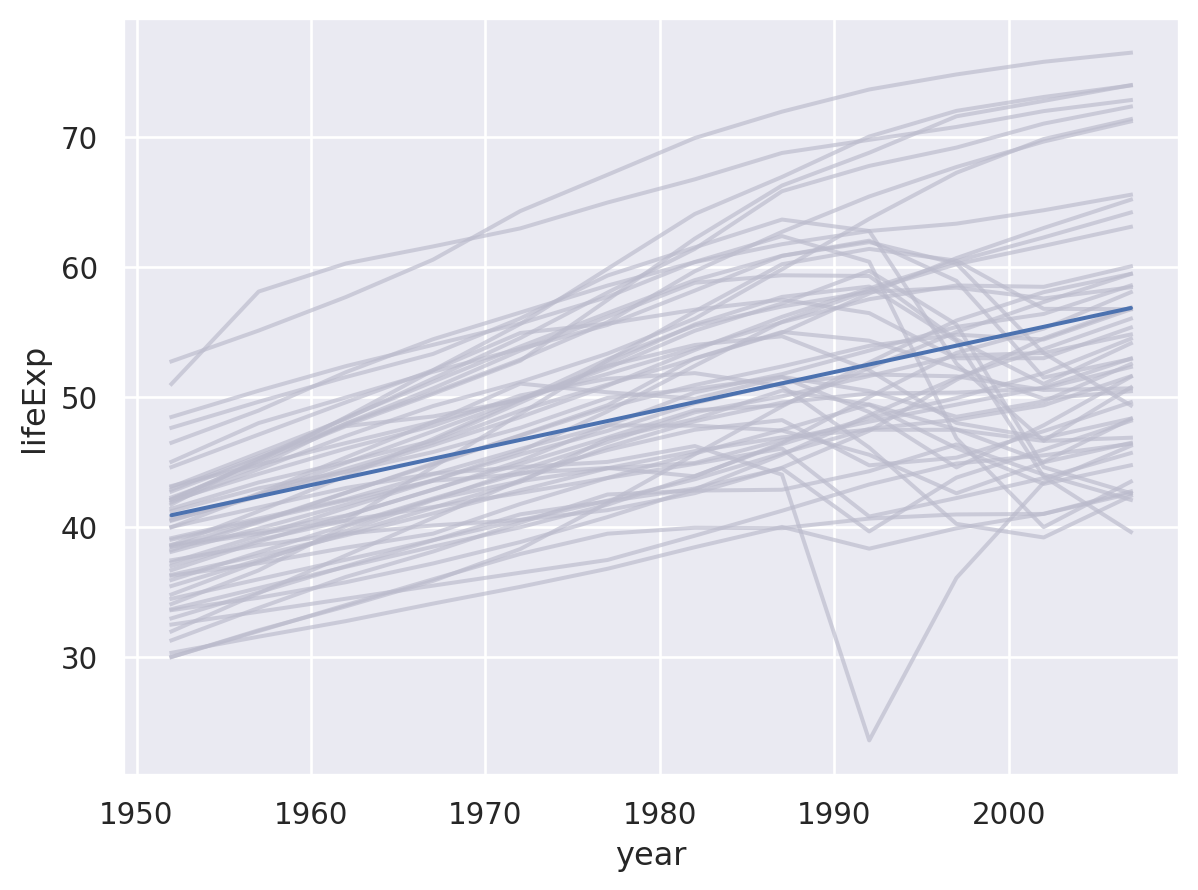

In [16]:
#Africa
(
  so.Plot( data = Africa, x= "year", y = "lifeExp")
  .add(so.Lines(color = "#bbca"), group = "country")
  .add(so.Line(), so.PolyFit(1))
)


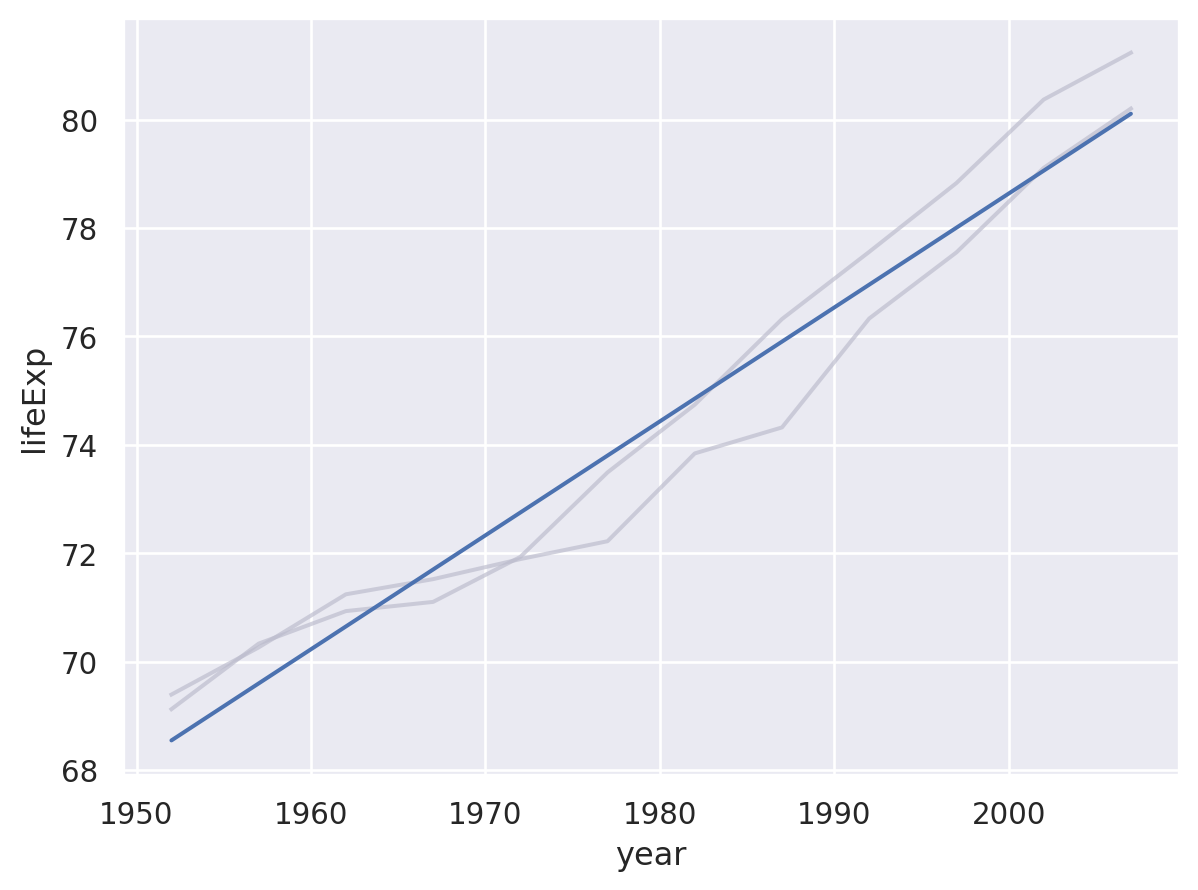

In [17]:
#Oceania
(
  so.Plot( data = Oceania, x= "year", y = "lifeExp")
  .add(so.Lines(color = "#bbca"), group = "country")
  .add(so.Line(), so.PolyFit(1))
)

## Ej 6

Trabajaremos con el dataset penguins

In [18]:
import seaborn as sns
penguins = sns.load_dataset("penguins")

¿Cuantas filas y columnas hay en este dataset?

In [19]:
penguins.shape

(344, 7)

Tiene 344 filas y 7 columnas

## Ej 7

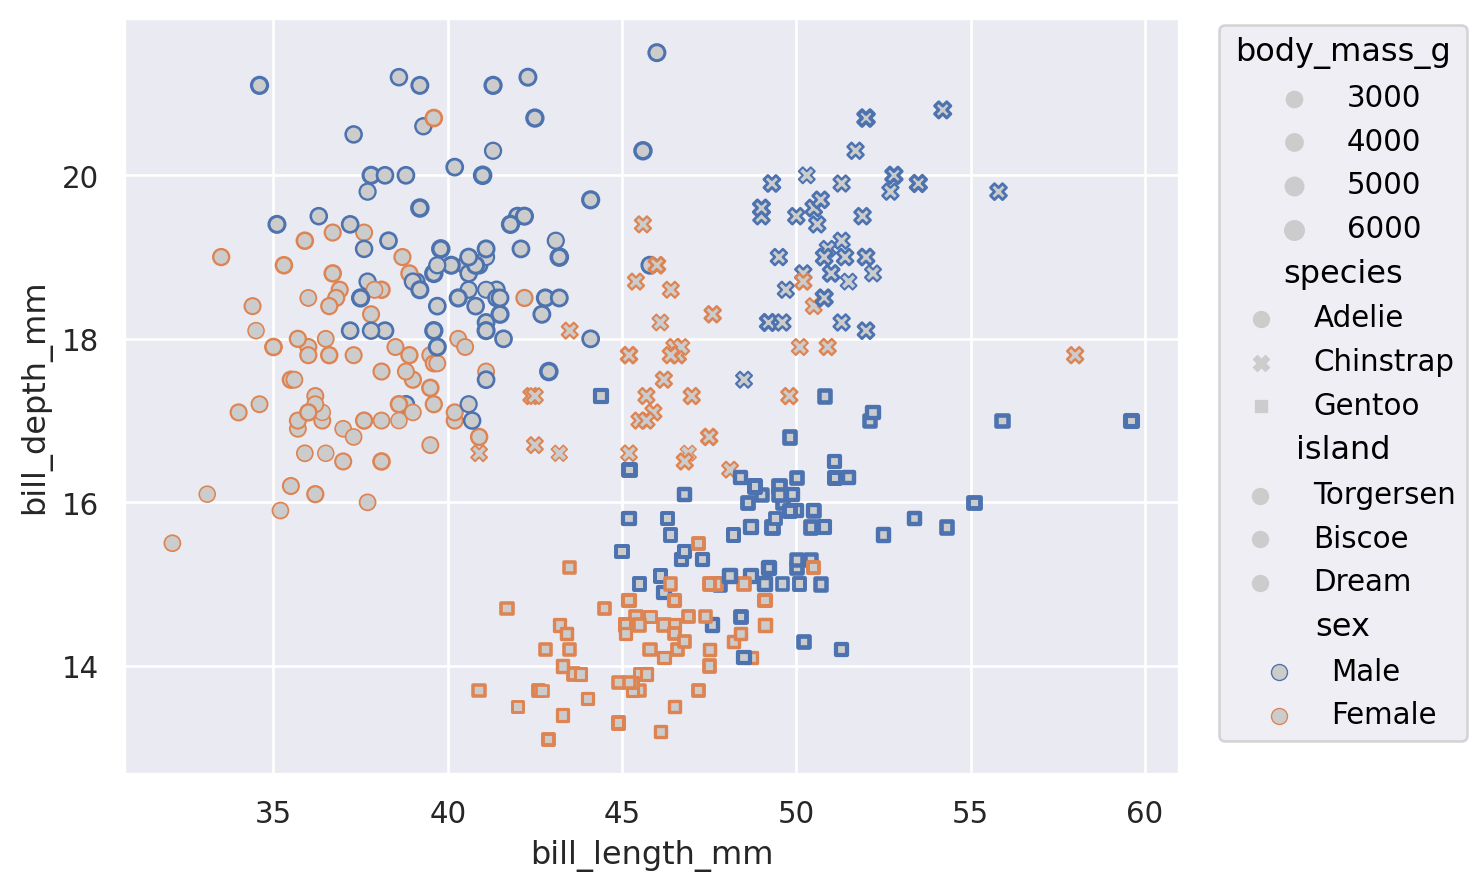

In [20]:
(
  so.Plot(
      penguins, x = "bill_length_mm", y = "bill_depth_mm",
      edgewidth= "body_mass_g", marker = "species",
      linestyle= "island", color = "species"
  )
  .add(so.Dot(color =".8"), edgecolor="sex")
)

- Esperamos un grafico que distinga los pinguinos masculinos y femeninos. El resto no se puede distinguir todavia.

- El color se pasa de Plot a Dot, pues al principio estamos coloreando todo de "species" pero luego coloreamos algunos de "0.8". Las que no pueden pasarse son los ejes "x" e "y", el resto (creo) que si.

- En Dot() estamos coloreando algunos de los puntos con color ".8" por dentro, y por fuera el color respectivo a su sexo (azul = masculino, rosa = femenino).

## Ej 8

### a)

¿Cuantos pinguinos hay en cada isla en la base de datos?

In [21]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [22]:
#cantidades = gapminder.groupby("continent")["country"].nunique().reset_index(name="cantidad")


In [23]:
#expVida = gapminder[["year","lifeExp"]]
islas = penguins[["island","species"]]
islas



island species
0    Torgersen  Adelie
1    Torgersen  Adelie
2    Torgersen  Adelie
3    Torgersen  Adelie
4    Torgersen  Adelie
..         ...     ...
339     Biscoe  Gentoo
340     Biscoe  Gentoo
341     Biscoe  Gentoo
342     Biscoe  Gentoo
343     Biscoe  Gentoo

[344 rows x 2 columns]

In [24]:
islas_agrupadas = islas.groupby("island")
cantidad_pinguinos = islas_agrupadas["species"].count()
cantidad_pinguinos

island
Biscoe       168
Dream        124
Torgersen     52
Name: species, dtype: int64

### b)



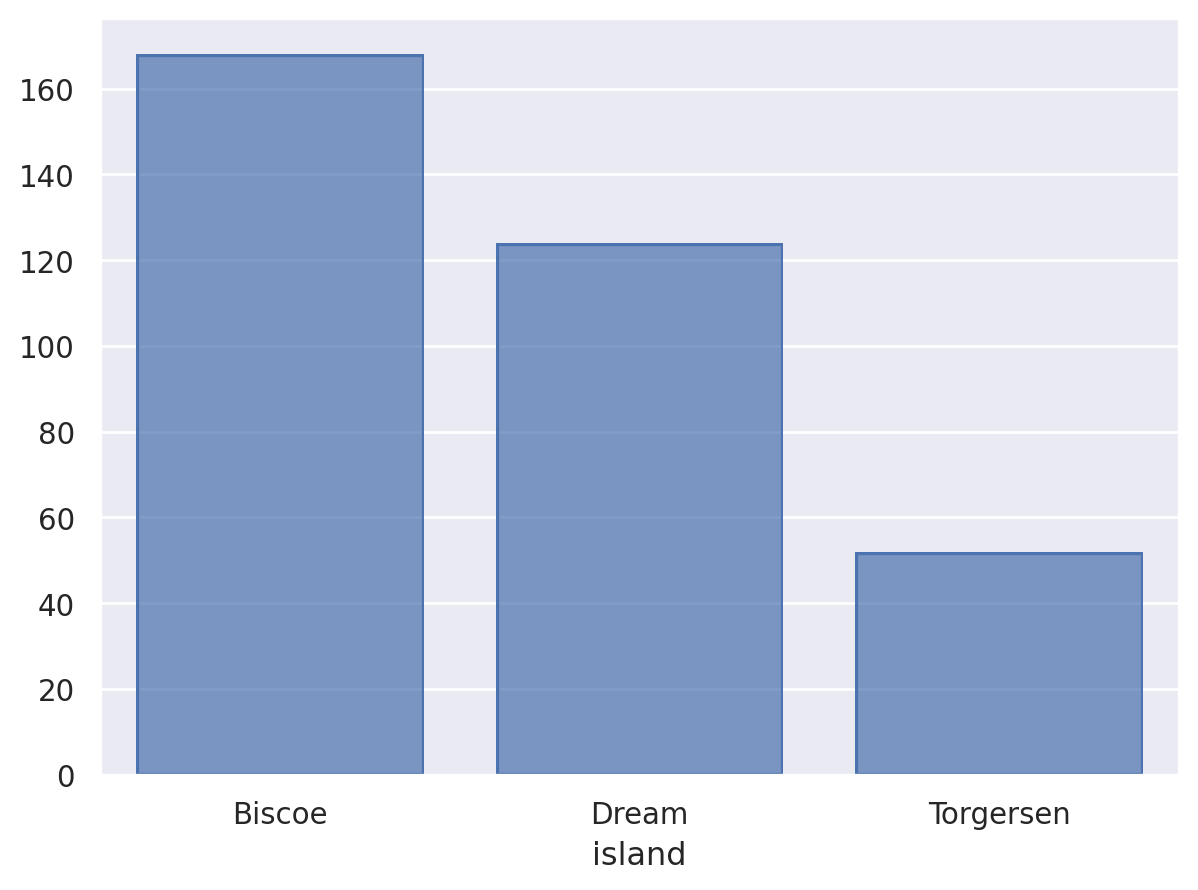

In [25]:
pinguinos_por_isla = cantidad_pinguinos
(
  so.Plot(x = pinguinos_por_isla.index, y = pinguinos_por_isla.values)
  .add(so.Bar())
)

### c) 



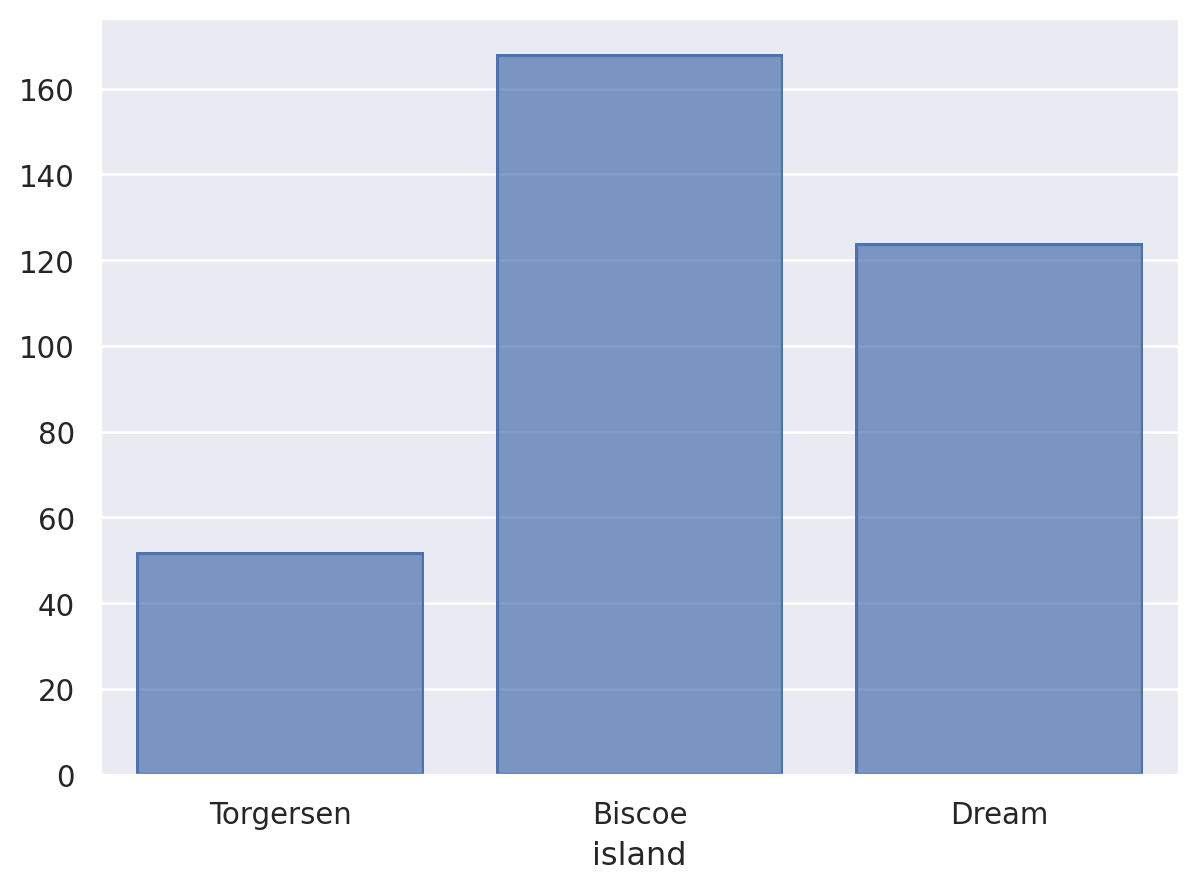

In [26]:
(
  so.Plot(data = penguins , x = "island")
  .add(so.Bar(), so.Hist())
)

### d)

Al ser un histograma, el grafico no depende de "y". Entonces no es necesario especificarlo.

### e)

In [35]:
penguins["island"]

0      Torgersen
1      Torgersen
2      Torgersen
3      Torgersen
4      Torgersen
         ...    
339       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 344, dtype: object

In [49]:
penguins["island"].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

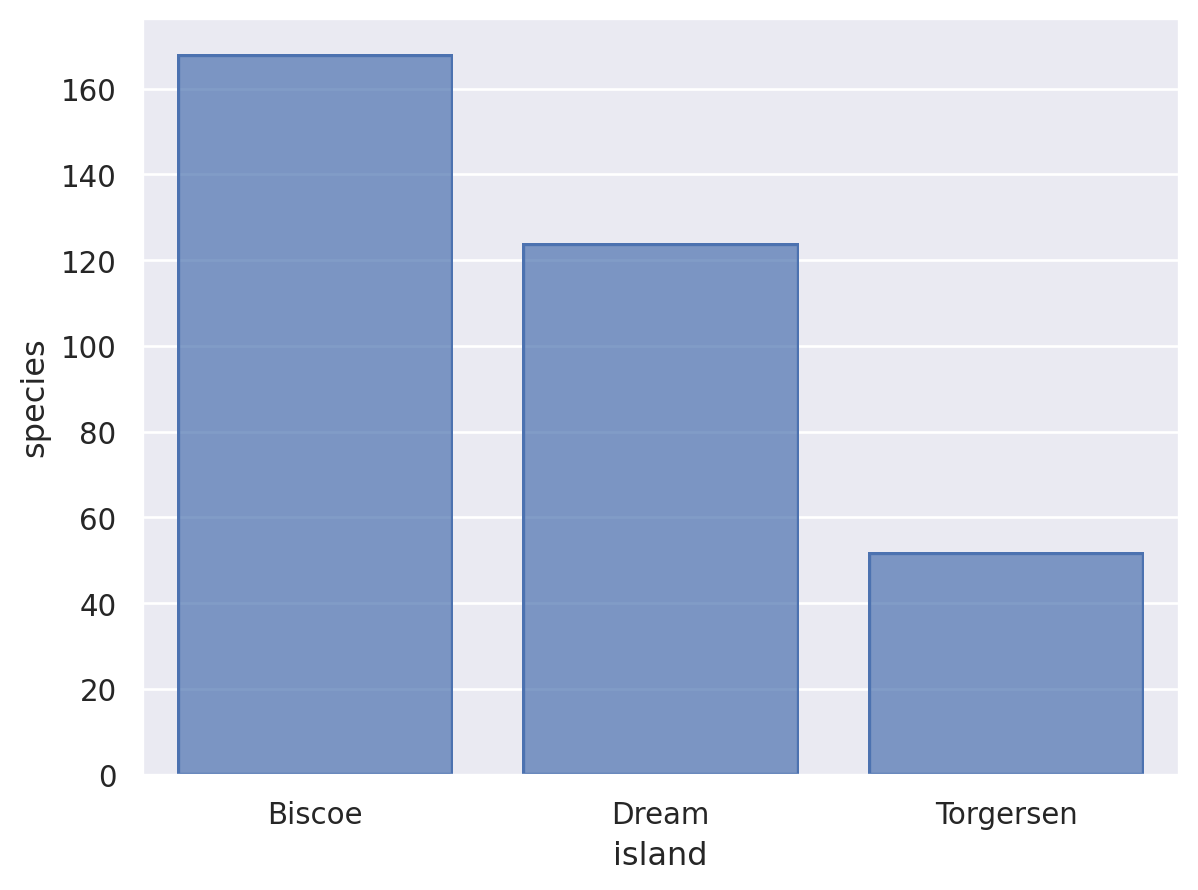

In [37]:
pinguinos_por_isla = cantidad_pinguinos
(
  so.Plot(x = pinguinos_por_isla.index, y = pinguinos_por_isla)
  .add(so.Bar(), so.Dodge())
)

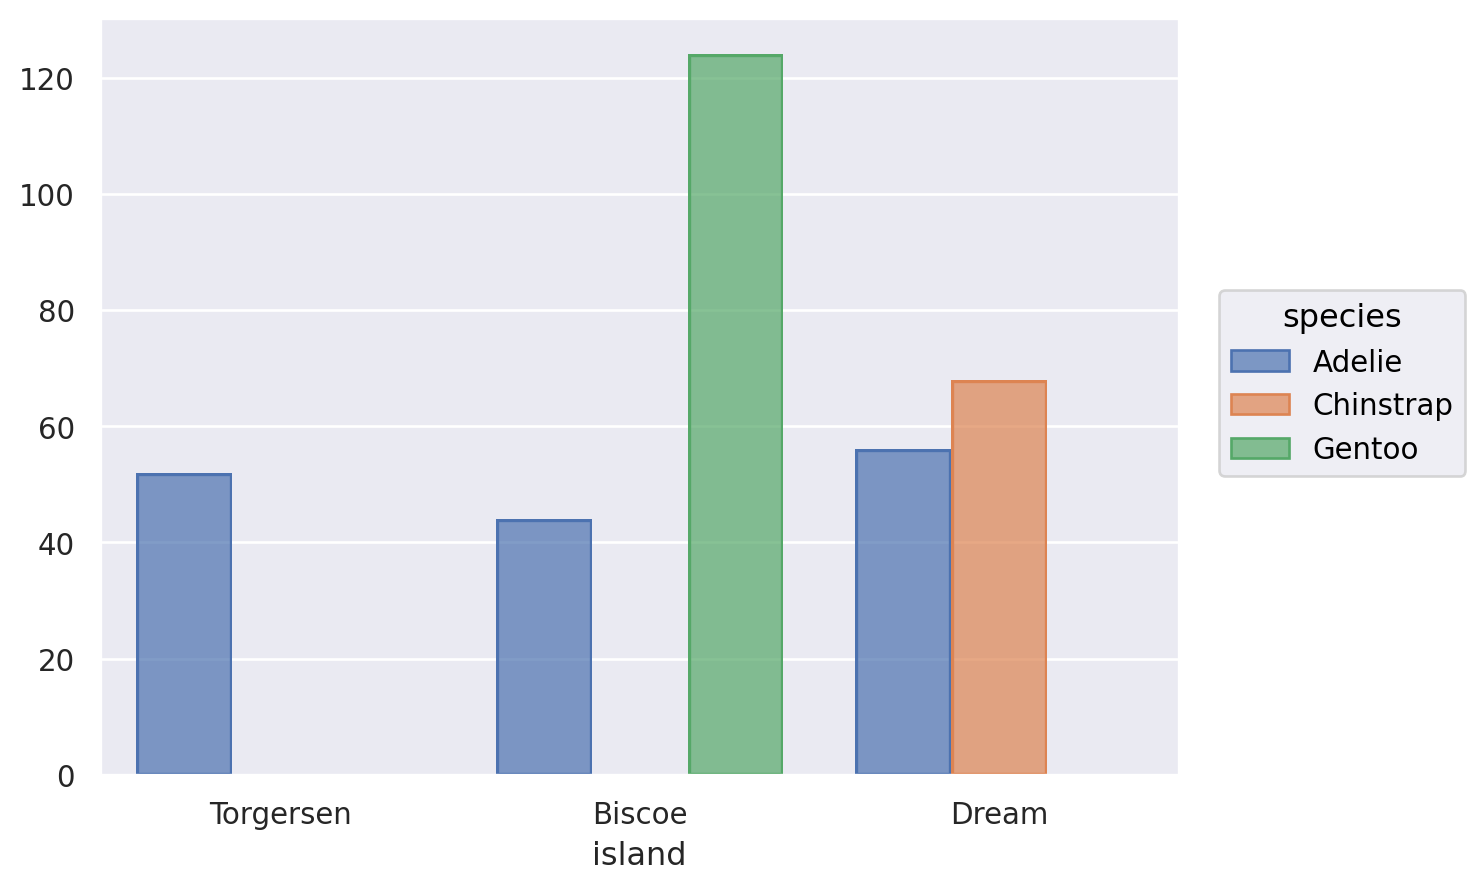

In [74]:
(
    so.Plot(data=penguins, x="island", color="species")
    .add(so.Bar(), so.Hist(), so.Dodge())
)

### f) NO HECHO

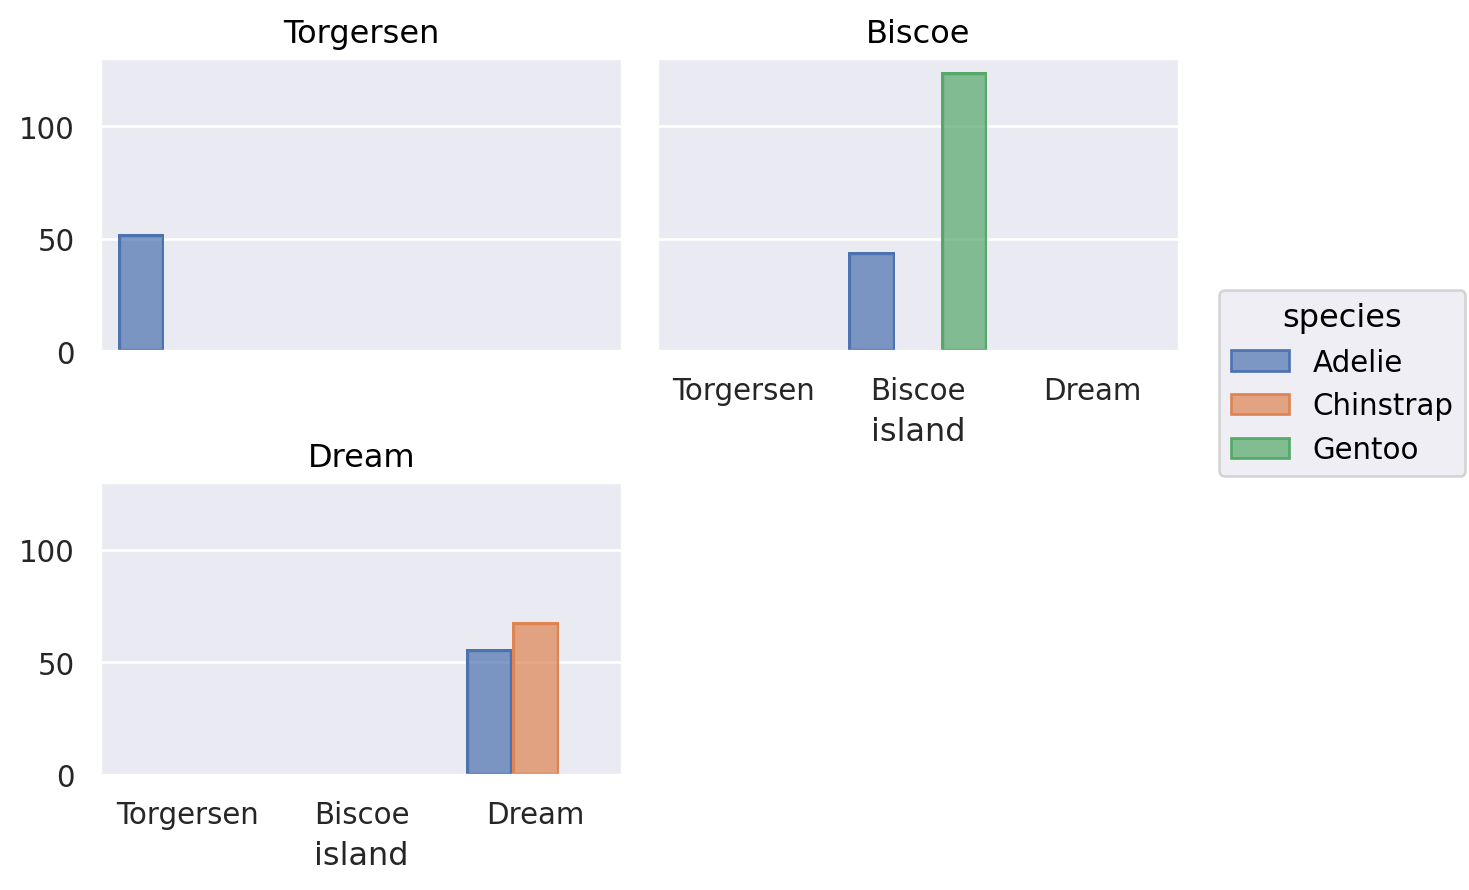

In [86]:
(
    so.Plot(data=penguins, x="island", color="species")
    .add(so.Bar(), so.Hist(), so.Dodge())
    .facet("island",wrap = 2)
)

## Ej 9

Queremos realizar un histograma de la ctidad de pinguinos en funcion del tamaño del ala ("flipper_length_mm").

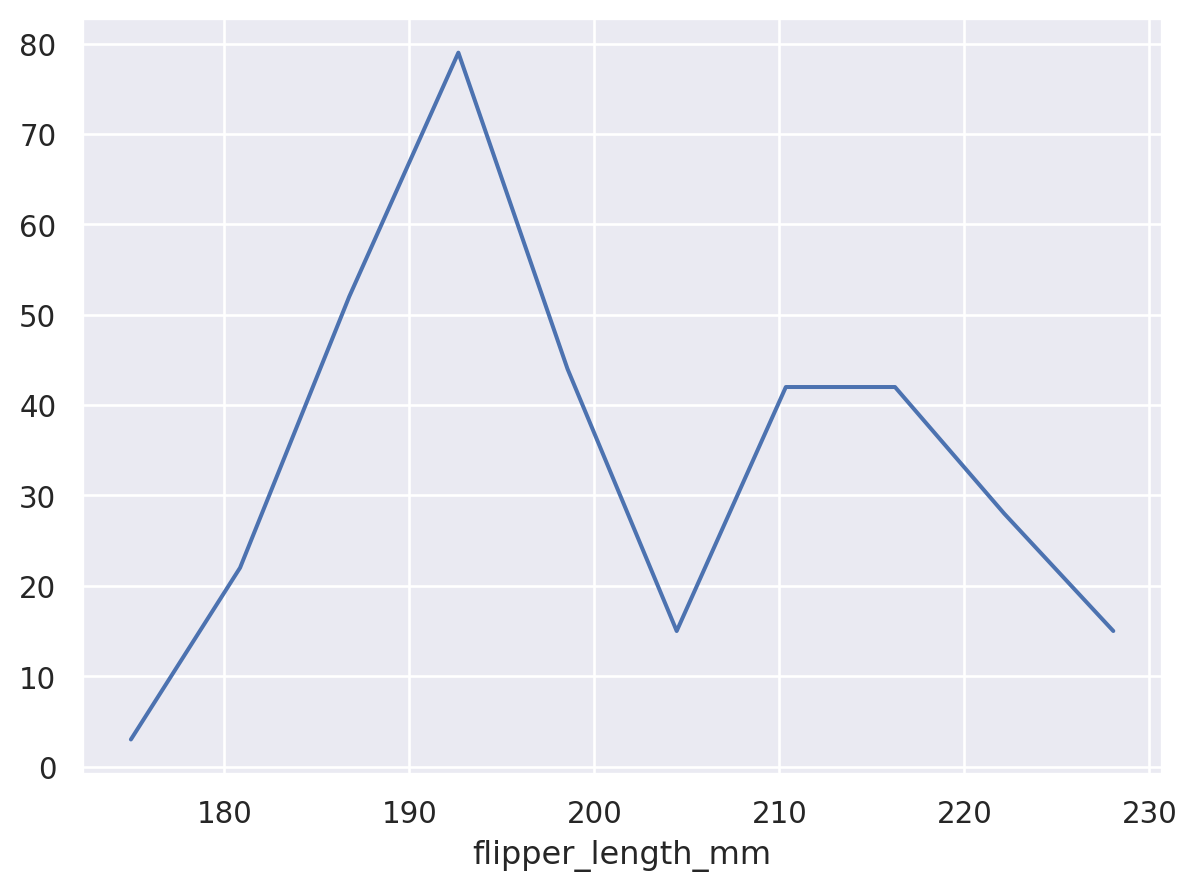

In [68]:
(
  so.Plot(
      penguins, x = "flipper_length_mm"
  )
  .add(so.Line(), so.Hist(), so.Dodge())
)

## Ej 10

### a)

Hacer un Scatterplot de bill_depth_mm (en "y") vs bill_length_mm (en "x")

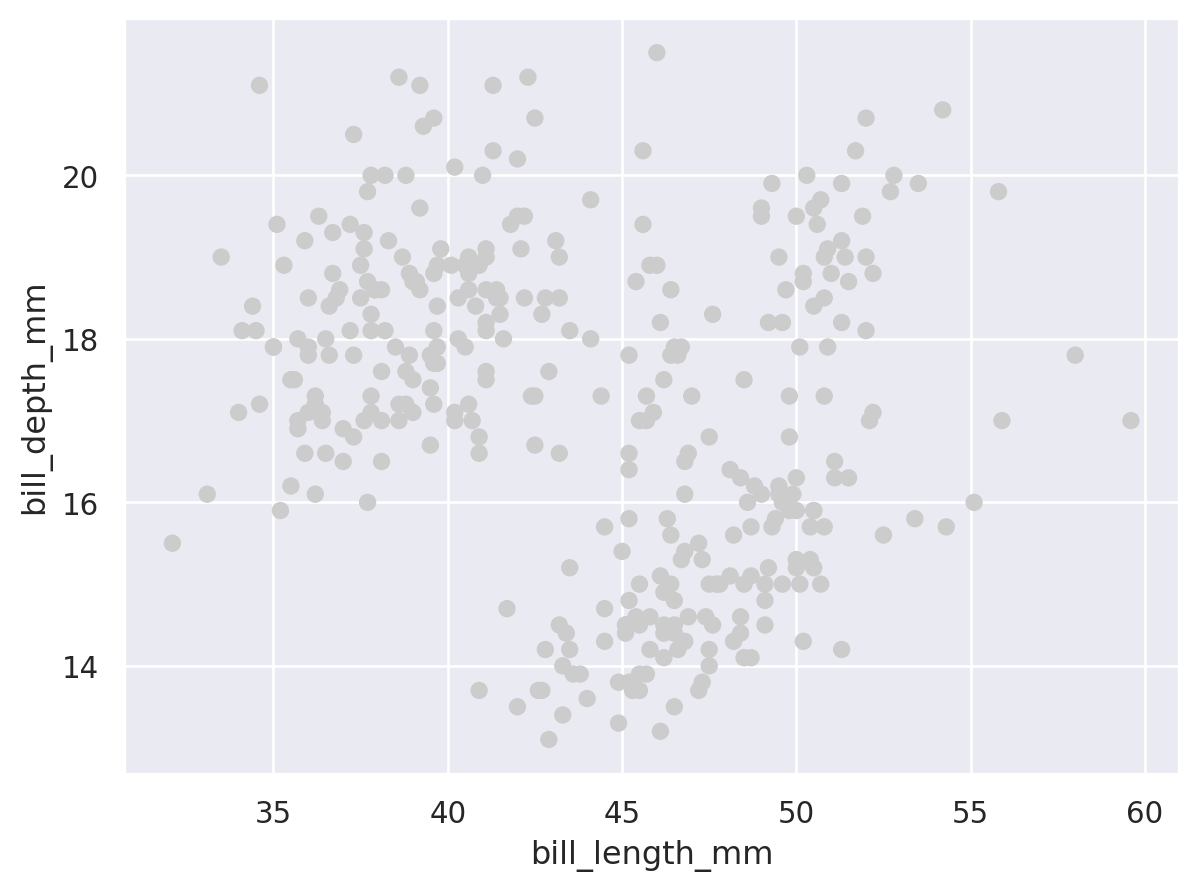

In [27]:
(
  so.Plot(
      penguins, x = "bill_length_mm", y = "bill_depth_mm"
  )
  .add(so.Dot(color =".8"))
)

### b)

Asi solo no podemos distinguir absolutamente nada. Falta especificar que tipo de pinguino es el que se quiere comparar.

### c)

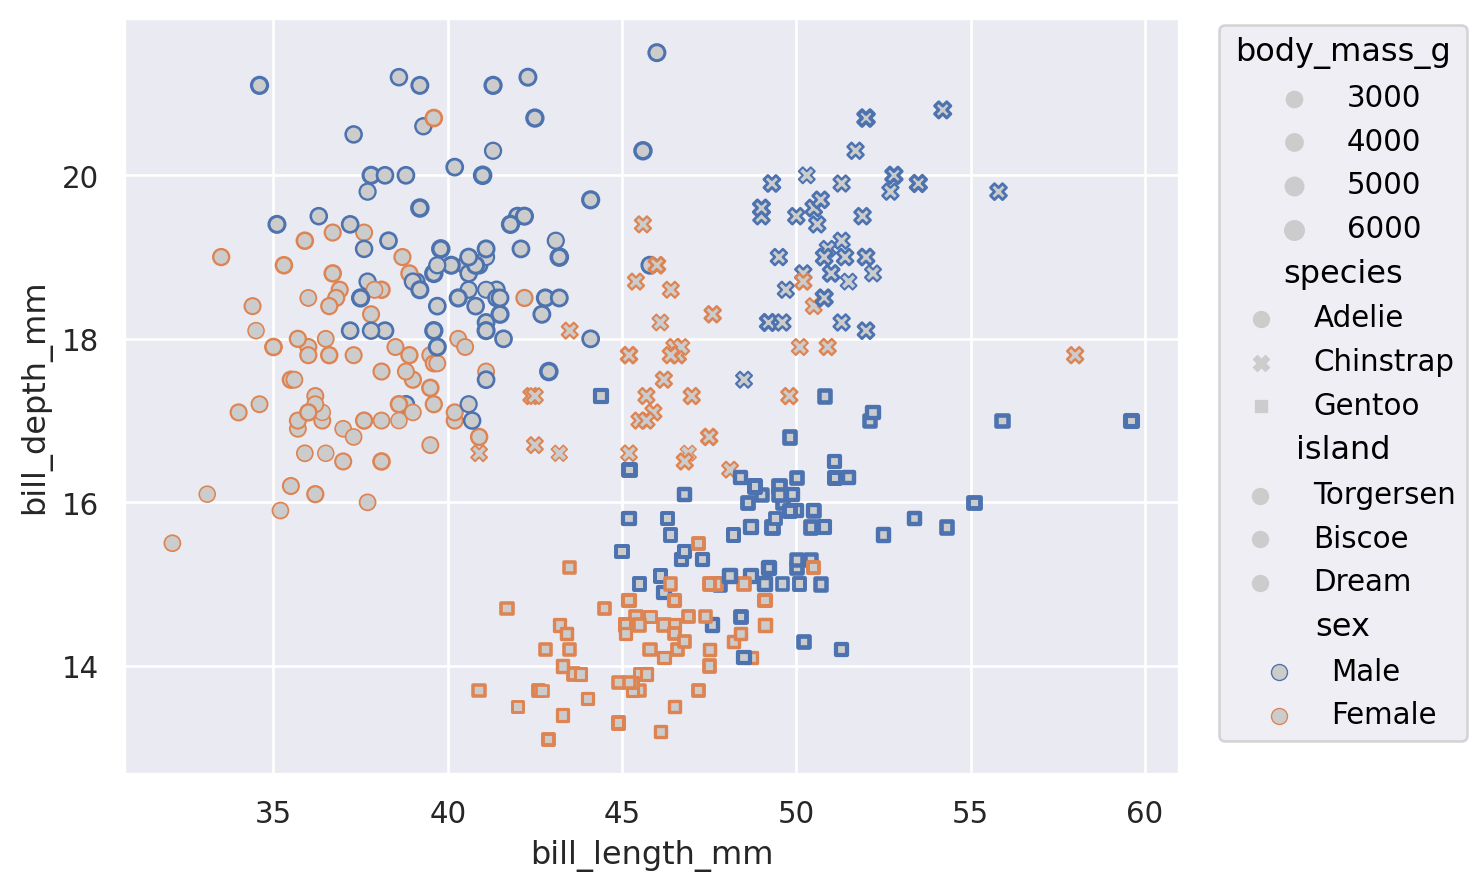

In [28]:
(
  so.Plot(
      penguins, x = "bill_length_mm", y = "bill_depth_mm",
      edgewidth= "body_mass_g", marker = "species",
      linestyle= "island", color = "species"
  )
  .add(so.Dot(color =".8"), edgecolor="sex")
)

Ahora distinguimos distintos grupos en el grafico que se diversifican entre a la especie, la isla y el sexo de los pinguinos.

## Ej 11

### a)

Calcular distintos estadisticos de la variable bill_depth_mm (minimo, maximo, media,...)

In [29]:
#obtenemos el dataset de los bill_depth_mm
depth = penguins["bill_depth_mm"]
depth.size

344

In [30]:
# minimo
minimo = min(depth)
print("El minimo es: ", minimo, "\n")

# maximo
maximo = max(depth)
print("El maximo es: ", maximo, "\n")
        
# media
media = depth.sum() / depth.size
print("La media es: ", media, "\n")
        
# mediana
if (depth.size % 2 == 0):
    # los 2 numeros del medio / 2
    mediana = (depth[depth.size / 2] + depth[(depth.size / 2) - 1]) / 2
else:
    #obtengo un float (pues depth.size % 2 != 0) lo convierto en int y le sumo 1 para obtener el indice del medio
    mediana = depth[int(depth.size / 2) + 1]
print("La mediana es: ", mediana, "\n")

El minimo es:  13.1 

El maximo es:  21.5 

La media es:  17.051453488372093 

La mediana es:  17.75 



### b)

Lo mas probable es que estos valores varien segun la especie, pues cada especie tiene sus propios minimos, maximos y cantidad totales. Con lo que tambien modificaria la media y la mediana.

In [31]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [32]:
species_depth = penguins[["species", "bill_depth_mm"]]
species_depth

species  bill_depth_mm
0    Adelie           18.7
1    Adelie           17.4
2    Adelie           18.0
3    Adelie            NaN
4    Adelie           19.3
..      ...            ...
339  Gentoo            NaN
340  Gentoo           14.3
341  Gentoo           15.7
342  Gentoo           14.8
343  Gentoo           16.1

[344 rows x 2 columns]

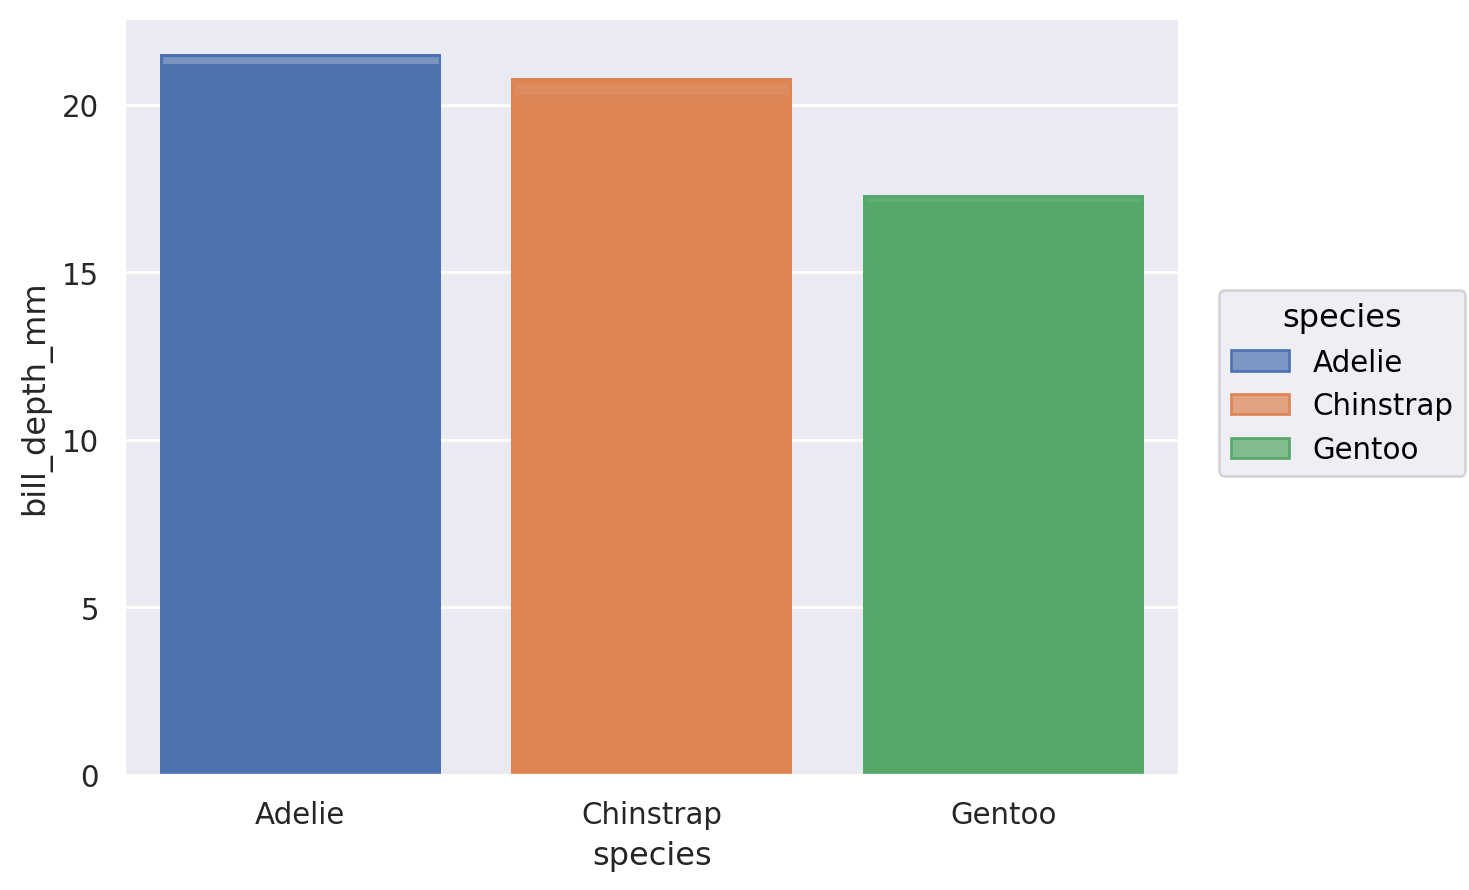

In [33]:
#usaremos BoxPLot para ver la relacion entre "species" y "bill_depth_mm"

(
    so.Plot(
        species_depth, x = "species", y ="bill_depth_mm",color = "species")
        .add(so.Bar())
)

Al ser 3 barras distintas para cada especie, podemos afirmar que los valores obtenidos de maximo, minimo, etc... no pueden ser todos identicamente iguales.

## Ej 12

### a)

Rehacer el scatter plot del ej 10, coloreando los puntos segun el sexo. ¿Que se observa?

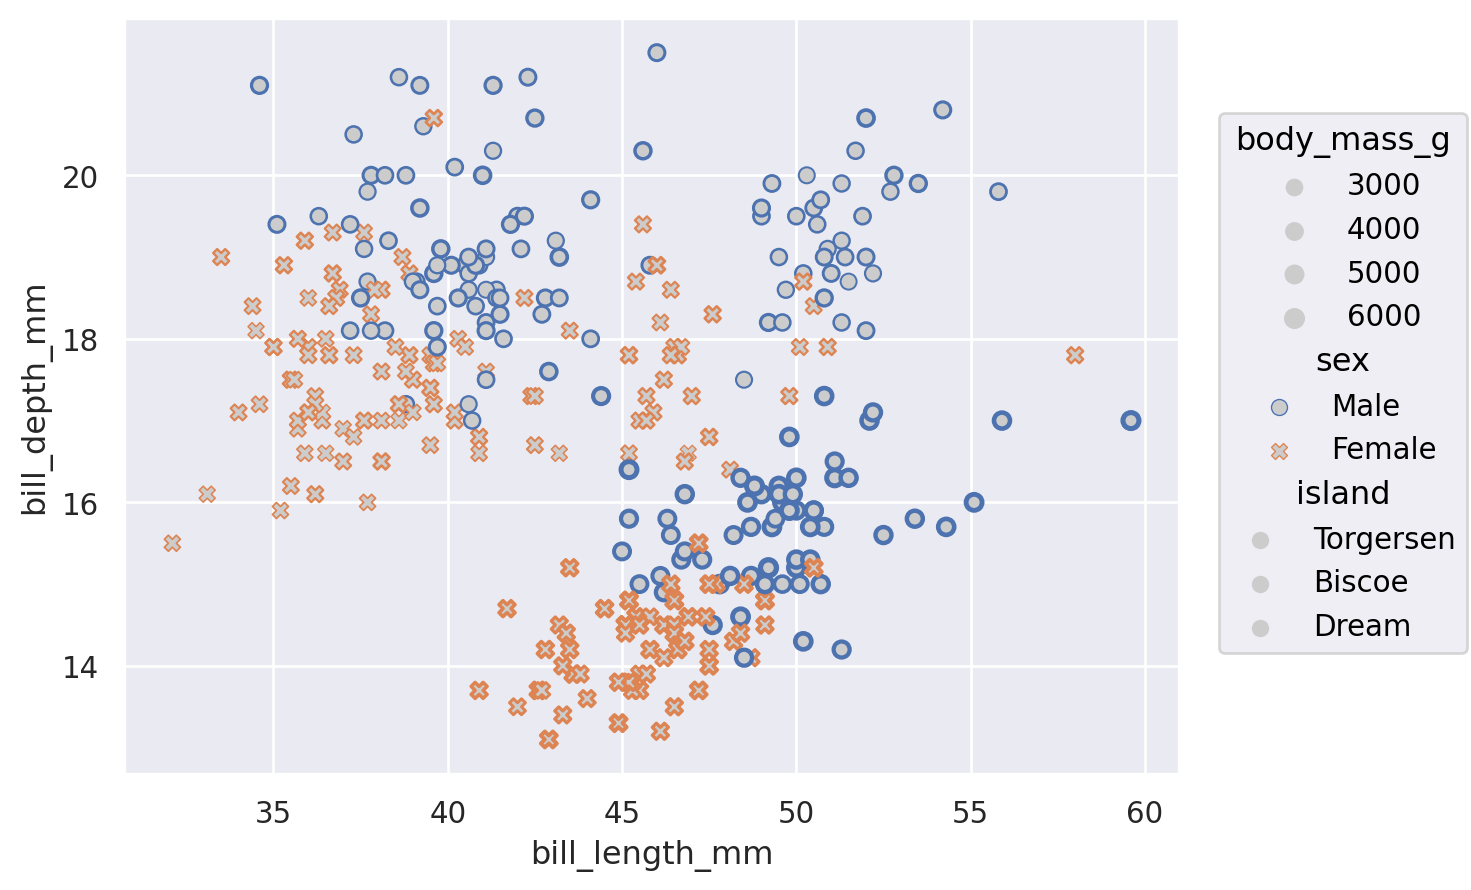

In [34]:
(
  so.Plot(
      penguins, x = "bill_length_mm", y = "bill_depth_mm",
      edgewidth= "body_mass_g", marker = "sex", color = "sex",
      linestyle= "island"
  )
  .add(so.Dot(color =".8"), edgecolor="sex")
)

Se observa que el bill_length_mm de los machos es en promedio mas alto que el de las hembras.